In [1]:
using TaskGraphs

In [2]:
## Initialize a 9x9 grid sapce
vtx_grid = initialize_dense_vtx_grid(9,9) 

9×9 VtxGrid{Matrix{Int64}}:
  1   2   3   4   5   6   7   8   9
 10  11  12  13  14  15  16  17  18
 19  20  21  22  23  24  25  26  27
 28  29  30  31  32  33  34  35  36
 37  38  39  40  41  42  43  44  45
 46  47  48  49  50  51  52  53  54
 55  56  57  58  59  60  61  62  63
 64  65  66  67  68  69  70  71  72
 73  74  75  76  77  78  79  80  81

In [3]:
## Constructing the factory environment from the grid space
env = construct_factory_env_from_vtx_grid(vtx_grid)

GridFactoryEnvironment{MetaGraphs.MetaGraph{Int64, Float64}}
  graph: MetaGraphs.MetaGraph{Int64, Float64}
  x_dim: Int64 9
  y_dim: Int64 9
  cell_width: Float64 1.0
  transition_time: Float64 1.0
  vtxs: Array{Tuple{Int64, Int64}}((81,))
  pickup_zones: Array{Int64}((81,)) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
  dropoff_zones: Array{Int64}((81,)) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
  free_zones: Array{Int64}((81,)) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
  obstacles: Array{Tuple{Int64, Int64}}((0,))
  vtx_map: VtxGrid{Matrix{Int64}}
  edge_cache: Array{Set{Tuple{Int64, Int64}}}((81,))
  expanded_zones: Dict{Int64, Dict{Tuple{Int64, Int64}, Vector{Int64}}}
  dist_function: DistMatrixMap{SparseDistanceMatrix{MetaGraphs.MetaGraph{Int64, Float64}, SparseArrays.SparseMatrixCSC{Int64, Int64}}}


In [4]:
## Defining the initial conditions of the objects
#Assume that there are 2 objects located at grid 46 grid55 initially
object_il=[28,37] #object intial location
# We would want the objects to be delivered out at grid 1 grid 10
object_fl=[1] #object final location

## Definining the locations of the robot
#Assume that the robots are located at grid 73 74
robot_il=[55,56,57] ## robot initial location

## Initializing an empty project spec
spec= ProjectSpec() 

ProjectSpec
  graph: Graphs.SimpleGraphs.SimpleDiGraph{Int64}
  nodes: Array{Union{OBJECT_AT, Operation}}((0,))
  vtx_map: Dict{AbstractID, Int64}
  vtx_ids: Array{AbstractID}((0,))
  initial_conditions: Dict{ObjectID, OBJECT_AT}
  final_conditions: Dict{ObjectID, OBJECT_AT}


In [5]:
## Setting up the object initial conditions
for (id,location) in enumerate(object_il)
    set_initial_condition!(spec,OBJECT_AT(id,location))
end
set_initial_condition!(spec,OBJECT_AT(4,78)) ## also adding a sticker object4 at location 78
## Setting up intial conditions for robots
robot_ic=[]
for (id,location) in enumerate(robot_il)
    push!(robot_ic,ROBOT_AT(id,location)) ## adding the robots into the project speck
end

In [6]:
## Setting up the operations
bundling = Operation(Δt=4) # (for instance bundling obj1, obj2. into a box)
sticker = Operation(Δt=2) # (Applying stickers on obj3)
verify = Operation(Δt=3) # (Final human check before delivery for obj3)
terminate = Operation(Δt=0) # Terminating operation

Operation
  pre: Dict{ObjectID, OBJECT_AT}
  post: Dict{ObjectID, OBJECT_AT}
  Δt: Int64 0
  station_id: LocationID
  id: OperationID


In [7]:
## bundling operation
set_precondition!(bundling,OBJECT_AT(1,30)) # object 1 must be at vertex 30 before bundling can begin
set_precondition!(bundling,OBJECT_AT(2,39)) # object 1 must be at vertex 30 before bundling can begin
set_postcondition!(bundling,OBJECT_AT(3,32)) # bundling will produce object 3 at vertex 32
add_operation!(spec,bundling) # adding the bundling operation to project spec

ProjectSpec
  graph: Graphs.SimpleGraphs.SimpleDiGraph{Int64}
  nodes: Array{Union{OBJECT_AT, Operation}}((4,))
  vtx_map: Dict{AbstractID, Int64}
  vtx_ids: Array{AbstractID}((4,))
  initial_conditions: Dict{ObjectID, OBJECT_AT}
  final_conditions: Dict{ObjectID, OBJECT_AT}


In [8]:
## adding stickers
set_precondition!(sticker,OBJECT_AT(3,51)) # object 3 must be at vertex 60 before bundling can begin
set_precondition!(sticker,OBJECT_AT(4,60)) # object 4 must be at vertex 60 before bundling can begin
set_postcondition!(sticker,OBJECT_AT(5,53)) # sticker operation will produce object 5 at vertex 53
add_operation!(spec,sticker) # adding the sticker operation to project spec

ProjectSpec
  graph: Graphs.SimpleGraphs.SimpleDiGraph{Int64}
  nodes: Array{Union{OBJECT_AT, Operation}}((7,))
  vtx_map: Dict{AbstractID, Int64}
  vtx_ids: Array{AbstractID}((7,))
  initial_conditions: Dict{ObjectID, OBJECT_AT}
  final_conditions: Dict{ObjectID, OBJECT_AT}


In [9]:
## adding verify
set_precondition!(verify,OBJECT_AT(5,16)) # object 5 must be at vertex 16 before verification can begin
set_postcondition!(verify,OBJECT_AT(6,14)) # verification will produce object 6 at vertex 14
add_operation!(spec,verify) # adding the verification operation to project spec

ProjectSpec
  graph: Graphs.SimpleGraphs.SimpleDiGraph{Int64}
  nodes: Array{Union{OBJECT_AT, Operation}}((9,))
  vtx_map: Dict{AbstractID, Int64}
  vtx_ids: Array{AbstractID}((9,))
  initial_conditions: Dict{ObjectID, OBJECT_AT}
  final_conditions: Dict{ObjectID, OBJECT_AT}


In [10]:
## adding termination
set_precondition!(terminate,OBJECT_AT(6,1))  # Object 6 will be at vertex 1 for termination
add_operation!(spec,terminate) # adding the termination operation

ProjectSpec
  graph: Graphs.SimpleGraphs.SimpleDiGraph{Int64}
  nodes: Array{Union{OBJECT_AT, Operation}}((10,))
  vtx_map: Dict{AbstractID, Int64}
  vtx_ids: Array{AbstractID}((10,))
  initial_conditions: Dict{ObjectID, OBJECT_AT}
  final_conditions: Dict{ObjectID, OBJECT_AT}


In [11]:
## Initializing the solver
solver = NBSSolver()
## solver passed into pctapf_probelm to determine its cost model
prob = pctapf_problem(solver,spec,env,robot_ic)
## Outputs the solution and cost
solution, cost = solve!(solver,prob)
@show feasible_status(solver)
@show optimal_status(solver)

feasible_status(solver) = true
optimal_status(solver) = true


true

In [12]:
## Check the path plan of the solution
solution.route_plan

LowLevelSolution:
   T:  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27   
   1: [55  46  37  28  29  30  31  32  32  32  33  42  51  42  33  24  15  14  14  14  14  14  14  5   4   3   2   1   ]
   2: [56  47  38  37  38  39  40  41  42  43  44  53  53  53  53  44  35  26  17  16  16  16  16  16  16  16  16  16  ]
   3: [57  58  59  60  69  78  69  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  ]


## Plotting the result

In [13]:
## Plotting the result (optional)
using Plots

In [14]:
bot_1_path=[]
bot_2_path=[]
bot_3_path=[]
paths=solution.route_plan.paths
for i in 1:27
    append!(bot_1_path,paths[1][i].sp.vtx)## adding each vertex to each path
    append!(bot_2_path,paths[2][i].sp.vtx)## adding each vertex to each path
    append!(bot_3_path,paths[3][i].sp.vtx)## adding each vertex to each path

end

In [15]:
function covert_to_coordinate(vertex_num,n)
    """
    Given a vertex_num and the length of the factory, convert it to (x,y) coordinate
    """
    if vertex_num%n==0
        return n,abs(floor(Int,vertex_num/n)-n)+1
    end
    x=abs(floor(Int,vertex_num/n)-n)
    y=vertex_num%n
    return y,x
end

covert_to_coordinate (generic function with 1 method)

In [16]:
function generate_coordinates(path,n)
    """
    Generate x,y coordinates given a path of vertex numbers and factory size
    """
    x_ls=[]
    y_ls=[]
    for i in 1:length(path)
        x,y=covert_to_coordinate(path[i],n)
        append!(x_ls,x)
        append!(y_ls,y)
    end
    return x_ls,y_ls
end

generate_coordinates (generic function with 1 method)

In [17]:
bot1_x,bot1_y=generate_coordinates(bot_1_path,9)
bot2_x,bot2_y=generate_coordinates(bot_2_path,9)
bot3_x,bot3_y=generate_coordinates(bot_3_path,9)

(Any[4, 5, 6, 6, 6, 6, 6, 6, 6, 6  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6], Any[3, 3, 3, 2, 1, 2, 3, 3, 3, 3  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

┌ Info: Saved animation to /Users/felixmeng/SISL/Trajectory.gif
└ @ Plots /Users/felixmeng/.julia/packages/Plots/m8l21/src/animation.jl:156


Plots.AnimatedGif("/Users/felixmeng/SISL/Trajectory.gif")
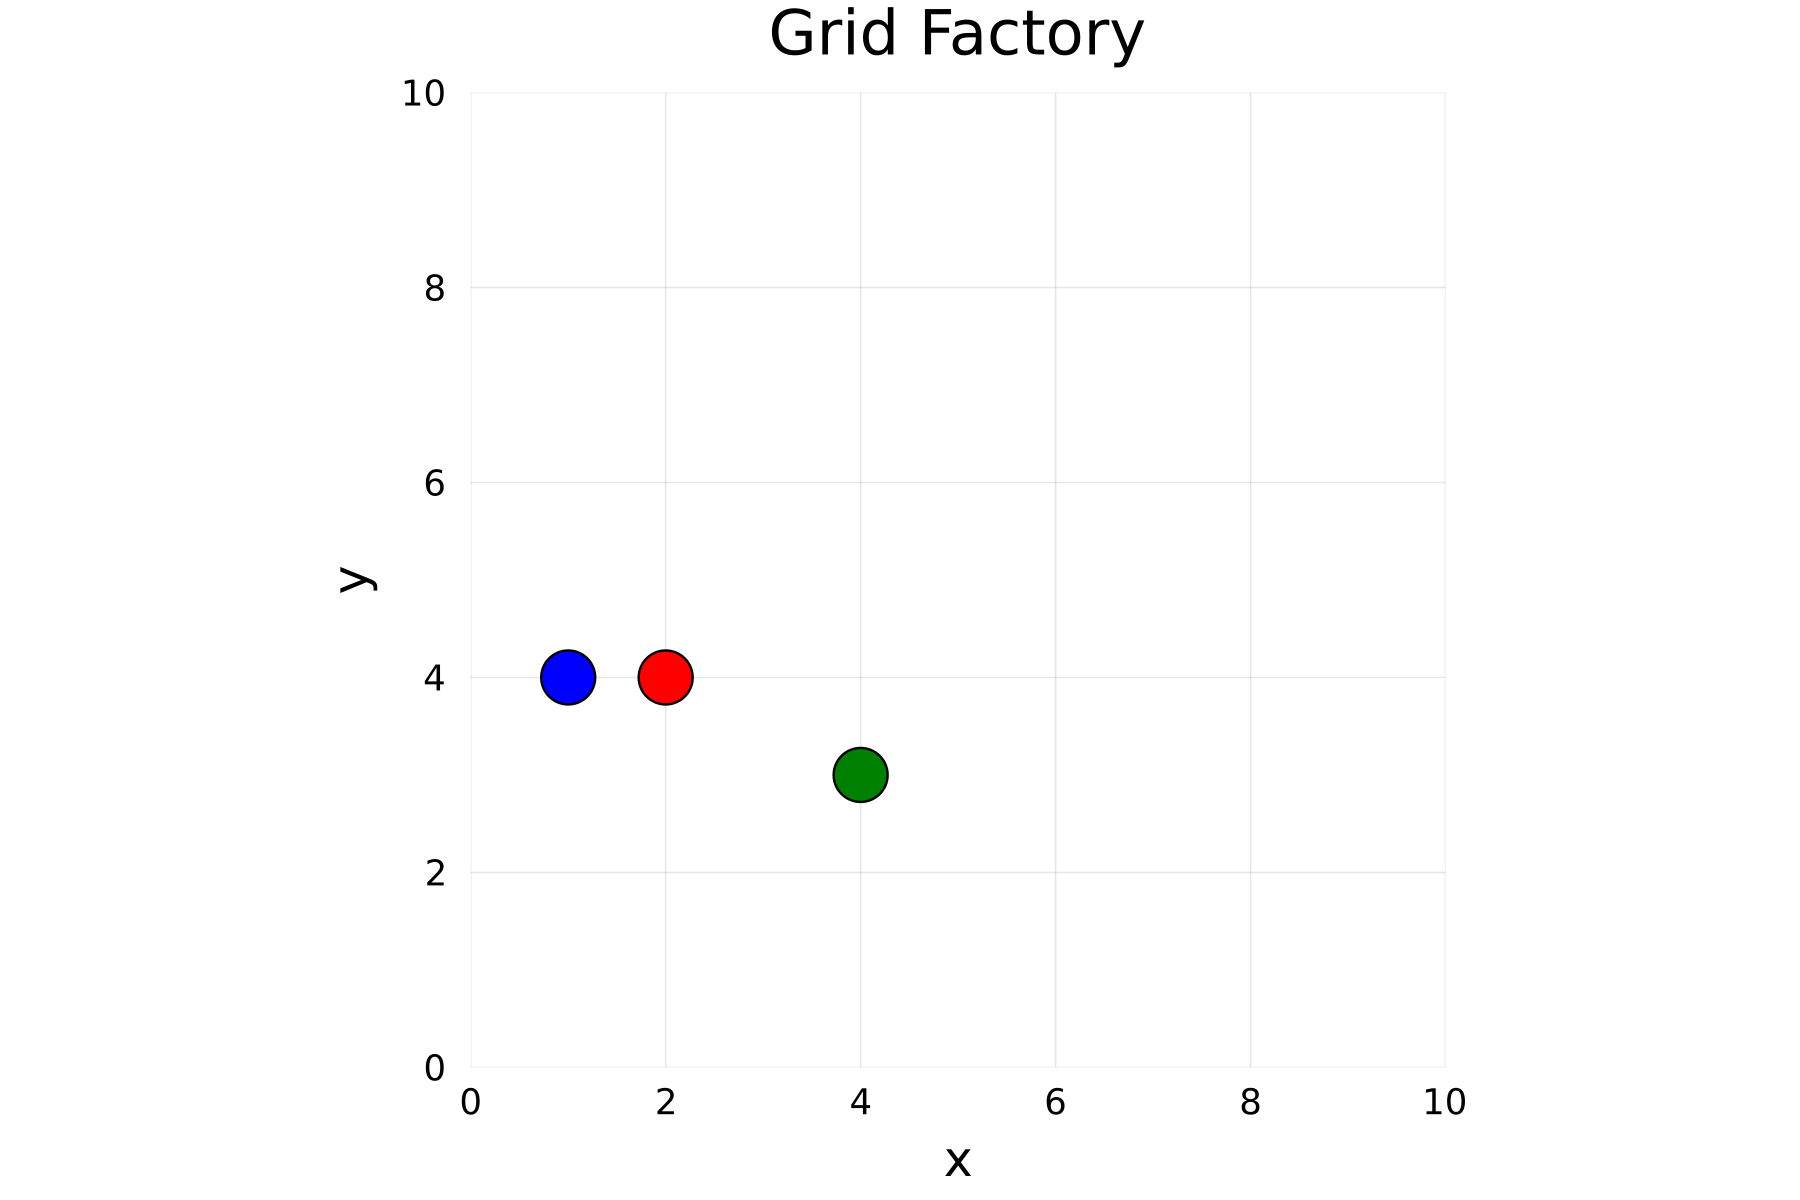

In [18]:
t = 1:1:length(bot1_x)
n = length(t)
# animation
anim = @animate for i in 1:n
    scatter([bot1_x[i],bot2_x[i],bot3_x[i]], [bot1_y[i],bot2_y[i],bot3_y[i]], legend=:none, title="Grid Factory",
            markersize=10, markercolor=["blue","red","green"],
            xaxis=("x", (0,10)), yaxis=("y", (0, 10)),
            framestyle=:grid, aspect_ratio=1, dpi=300)
end
gif(anim, "Trajectory.gif", fps=1)